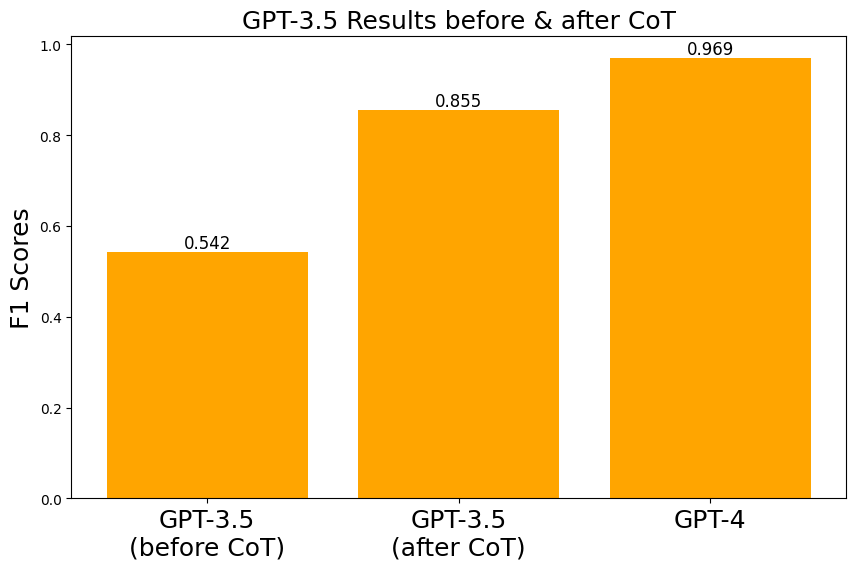

In [109]:
import matplotlib.pyplot as plt 


#before cot


# creating the dataset

models = ["GPT-3.5\n(before CoT)", "GPT-3.5\n(after CoT)","GPT-4"]
values = [0.542, 0.855, 0.969]
  
fig = plt.figure(figsize = (10, 6))
 
# creating the bar plot
plt.bar(models, values, color = "orange")

for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize = 12)
 
plt.ylabel("F1 Scores", fontsize = 18)
plt.title("GPT-3.5 Results before & after CoT", fontsize = 18)
plt.xticks(fontsize = 18)
plt.show()

In [116]:
import pandas as pd

f = pd.read_excel("k5_merged.xlsx")
f = f[:99]
f = f.rename(columns={"gpt3.5_relevant": "gpt3", "3.5 with unsure": "gpt3unsure"})
f


,Unnamed: 0,pmid,distance,title,gpt3,gpt3unsure,gpt4_relevant,Amy,Kaylin,Unnamed: 9,...,celltypes,Unnamed: 12,concepts,Unnamed: 14,ion_channels,Unnamed: 16,regions,Unnamed: 18,receptors,transmitters
0,0,35500112,0.035637,Deep brain stimulation in the subthalamic nucl...,Yes,Yes,yes,T,T,NaN,...,"""Neocortex fast spiking (FS) interneuron"", ""Ne...",2023-02-03 00:00:00,"""Deep brain stimulation"", ""Oscillations"", ""The...",2023-07-09,NaN,NaN,"""Subthalamic Nucleus"", ""Striatum"", ""Basal gang...",2023-03-03 00:00:00,"""Dopaminergic Receptor""","""Dopamine"""
1,1,34894291,0.036794,Deep brain stimulation for movement disorder t...,Yes,yes,Yes,T,T,NaN,...,"""Globus pallidus principal GABA cell"", ""Subtha...",2023-01-02 00:00:00,"""Deep brain stimulation"", ""Parkinson's"", ""Ther...",2023-04-06,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Subthalamic Nucl...",2023-04-04 00:00:00,NaN,"""Dopamine"""
2,2,35552409,0.036814,Excitatory deep brain stimulation quenches bet...,Yes,Yes,Yes,T,T,NaN,...,"""Globus pallidus principal GABA cell"", ""Subtha...",2023-02-02 00:00:00,"""Oscillations"", ""Parkinson's"", ""Deep brain sti...",2023-06-07,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Subthalamic Nucl...",2023-04-04 00:00:00,NaN,Dopamine
3,3,35245281,0.038188,Stimulating at the right time to recover netwo...,Yes,yes,Yes,T,T,NaN,...,"Subthalamus nucleus projection neuron, Neocort...",2023-01-02 00:00:00,"""Synchronization"", ""Oscillations"", ""Therapeuti...",2023-07-10,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Subthalamic Nucl...",2023-02-03 00:00:00,NaN,"""Dopamine"""
4,4,35569510,0.040527,Virtual deep brain stimulation: Multiscale co-...,Yes,yes,Yes,T,T,NaN,...,No cell types mentioned.,NaN,"""Deep brain stimulation"", ""Parkinson's"", ""Ther...",2023-05-06,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Human""",2023-03-03 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,35976323,0.058468,Deep brain stimulation in Parkinson's disease:...,No,no,No,F,F,NaN,...,The abstract does not mention any specific cel...,NaN,"""Deep brain stimulation"", ""Parkinson's"", ""Ther...",NaT,The article does not mention any ion channels.,NaN,"""Human""",NaN,NaN,NaN
95,95,36374001,0.058514,Revisiting the involvement of tau in complex n...,Yes,Yes,Yes,T,T,NaN,...,NaN,NaN,"""Bursting"", ""Synchronization"", ""Methods"", ""Epi...",NaT,NaN,NaN,"""Hippocampus"", ""Entorhinal cortex"", ""Mouse""",NaN,NaN,NaN
96,96,35793632,0.058522,Cholinergic interneuron inhibition potentiates...,Yes,Yes,No,F,F,NaN,...,"""Neostriatum interneuron ACh cell"", ""Neostriat...",NaN,"""Parkinson's"", ""Learning"", ""Action Selection/D...",NaT,No ion channels are mentioned in the text.,NaN,"""Striatum"", ""Mouse""",NaN,"""M4"", ""D1""","""Acetylcholine"", ""Dopamine"", ""Glutamate"""
97,97,36536272,0.058541,Dynamic effect of electromagnetic induction on...,Yes,Yes,Yes,T,T,NaN,...,NaN,NaN,"""Epilepsy"", ""Therapeutics"", ""Simplified Models...",NaT,NaN,NaN,"""Thalamus""",NaN,NaN,NaN


In [78]:
gpt4 = list(f.gpt4_relevant.map(dict(yes = "T", Yes = "T", no="F", No = "F"))[:99])
gpt3 = list(f.gpt3.map(dict(yes = "T", Yes = "T", no="F", No = "F"))[:99])
amy = list(f["Amy"][:99])

In [70]:
from sklearn.metrics import f1_score
f1_score(amy, gpt4, average="macro")

0.9692451071761417

In [80]:
f1_score(amy, gpt3, average="macro")

0.5416666666666666

## Unsureness

In [129]:
import pandas as pd

f = pd.read_excel("k5_merged.xlsx")
f = f[:99]
f = f.rename(columns={"gpt3.5_relevant": "gpt3", "3.5 with unsure": "gpt3unsure"})
f

,Unnamed: 0,pmid,distance,title,gpt3,gpt3unsure,gpt4_relevant,Amy,Kaylin,Unnamed: 9,...,celltypes,Unnamed: 12,concepts,Unnamed: 14,ion_channels,Unnamed: 16,regions,Unnamed: 18,receptors,transmitters
0,0,35500112,0.035637,Deep brain stimulation in the subthalamic nucl...,Yes,Yes,yes,T,T,NaN,...,"""Neocortex fast spiking (FS) interneuron"", ""Ne...",2023-02-03 00:00:00,"""Deep brain stimulation"", ""Oscillations"", ""The...",2023-07-09,NaN,NaN,"""Subthalamic Nucleus"", ""Striatum"", ""Basal gang...",2023-03-03 00:00:00,"""Dopaminergic Receptor""","""Dopamine"""
1,1,34894291,0.036794,Deep brain stimulation for movement disorder t...,Yes,yes,Yes,T,T,NaN,...,"""Globus pallidus principal GABA cell"", ""Subtha...",2023-01-02 00:00:00,"""Deep brain stimulation"", ""Parkinson's"", ""Ther...",2023-04-06,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Subthalamic Nucl...",2023-04-04 00:00:00,NaN,"""Dopamine"""
2,2,35552409,0.036814,Excitatory deep brain stimulation quenches bet...,Yes,Yes,Yes,T,T,NaN,...,"""Globus pallidus principal GABA cell"", ""Subtha...",2023-02-02 00:00:00,"""Oscillations"", ""Parkinson's"", ""Deep brain sti...",2023-06-07,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Subthalamic Nucl...",2023-04-04 00:00:00,NaN,Dopamine
3,3,35245281,0.038188,Stimulating at the right time to recover netwo...,Yes,yes,Yes,T,T,NaN,...,"Subthalamus nucleus projection neuron, Neocort...",2023-01-02 00:00:00,"""Synchronization"", ""Oscillations"", ""Therapeuti...",2023-07-10,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Subthalamic Nucl...",2023-02-03 00:00:00,NaN,"""Dopamine"""
4,4,35569510,0.040527,Virtual deep brain stimulation: Multiscale co-...,Yes,yes,Yes,T,T,NaN,...,No cell types mentioned.,NaN,"""Deep brain stimulation"", ""Parkinson's"", ""Ther...",2023-05-06,NaN,NaN,"""Thalamus"", ""Basal ganglia"", ""Human""",2023-03-03 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,35976323,0.058468,Deep brain stimulation in Parkinson's disease:...,No,no,No,F,F,NaN,...,The abstract does not mention any specific cel...,NaN,"""Deep brain stimulation"", ""Parkinson's"", ""Ther...",NaT,The article does not mention any ion channels.,NaN,"""Human""",NaN,NaN,NaN
95,95,36374001,0.058514,Revisiting the involvement of tau in complex n...,Yes,Yes,Yes,T,T,NaN,...,NaN,NaN,"""Bursting"", ""Synchronization"", ""Methods"", ""Epi...",NaT,NaN,NaN,"""Hippocampus"", ""Entorhinal cortex"", ""Mouse""",NaN,NaN,NaN
96,96,35793632,0.058522,Cholinergic interneuron inhibition potentiates...,Yes,Yes,No,F,F,NaN,...,"""Neostriatum interneuron ACh cell"", ""Neostriat...",NaN,"""Parkinson's"", ""Learning"", ""Action Selection/D...",NaT,No ion channels are mentioned in the text.,NaN,"""Striatum"", ""Mouse""",NaN,"""M4"", ""D1""","""Acetylcholine"", ""Dopamine"", ""Glutamate"""
97,97,36536272,0.058541,Dynamic effect of electromagnetic induction on...,Yes,Yes,Yes,T,T,NaN,...,NaN,NaN,"""Epilepsy"", ""Therapeutics"", ""Simplified Models...",NaT,NaN,NaN,"""Thalamus""",NaN,NaN,NaN


In [130]:
gpt3 = list(f.gpt3.map(dict(yes = "Yes", Yes = "Yes", no="No", No="No", unsure = "Unsure", Unsure = "Unsure"))[:99])
gpt3unsure = list(f.gpt3unsure.map(dict(yes = "Yes", Yes = "Yes", no="No", No="No", unsure = "Unsure", Unsure = "Unsure"))[:99])
gpt4 = list(f.gpt4_relevant.map(dict(yes = "Yes", Yes = "Yes", no="No", No="No", unsure = "Unsure", Unsure = "Unsure"))[:99])

In [131]:
total_unsure = 0
yes_to_unsure = 0
no_to_unsure = 0
for i in range(len(gpt3)):
    if gpt3unsure[i] == "Unsure":
        total_unsure += 1
        
    if gpt3[i] == "Yes" and gpt3unsure[i] == "Unsure":
        yes_to_unsure += 1
    
    if gpt3[i] == "No" and gpt3unsure[i] == "Unsure":
        no_to_unsure+= 1
        

In [132]:
total_unsure, yes_to_unsure, no_to_unsure

(10, 9, 1)

In [133]:
unsure_yes = 0
unsure_no = 0

for i in range(len(gpt3)):
    if gpt3unsure[i] == "Unsure" and gpt4[i] == "No":
        unsure_no += 1
        
    if gpt3unsure[i] == "Unsure" and gpt4[i] == "Yes":
        unsure_no += 1


unsure_yes, unsure_no

(0, 10)

## improvement in F1 score

In [9]:

import pandas as pd
from sklearn.metrics import f1_score

f = pd.read_excel("k5_merged.xlsx")
f = f[:99]
f = f.rename(columns={"gpt3.5_relevant": "gpt3", "3.5 with unsure": "gpt3unsure"})


gpt3unsure = list(f.gpt3unsure.map(dict(yes = "T", Yes = "T", no="F", No = "F", unsure = "F", Unsure = "F"))[:99])
amy = list(f["Amy"][:99])
gpt4 = list(f.gpt4_relevant.map(dict(yes = "Yes", Yes = "Yes", no="No", No="No", unsure = "Unsure", Unsure = "Unsure"))[:99])

f1_score(amy, gpt3unsure, average="macro")

0.6173913043478261